# Analysis of Free-Text Answers

## Setup

In [10]:
%run setup.py
%matplotlib inline

# Research Suggestions

In [8]:
data = dfdict['freetext-suggestions-final']
data.rename(columns={"Big topic": "Topic 1", "Unnamed: 9": "Topic 2", "Unnamed: 10": "Topic 3", "Unnamed: 11": "Topic 4"}, inplace=True)
data.head(3)

,ID,Suggestion,Validity,GRANULARITY,PROCESS,CONTEXT,CRITIQUE,CRITIQUE DETAIL,Topic 1,Topic 2,Topic 3,Topic 4
0,139.0,Building of economic models for comparing and ...,YES,DETAILED,NaN,NaN,NaN,NaN,Requirements prioritization,Model construction,NaN,NaN
1,139.0,Predicting the business impact of future softw...,YES,DETAILED,NaN,NaN,NaN,NaN,RE and organization,NaN,NaN,NaN
2,139.0,Observing user behaviour and connecting it to ...,YES,DETAILED,NaN,NaN,NaN,NaN,Data-driven RE,Human in the loop,NaN,NaN


### Count topics

# Reasons for Positive Ratings

In [83]:
data = dfdict['freetext-positive-final']
data.head(3)

,ID,Ifdn,Text,general,all industry,contextual,organizational,personal,not existing,scarce,difficult,unsatisfactory,adequate,plausible,on organization,on individual,Experience,not valid,not positive
0,2,116,Aligning requirements to regulatory standards ...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,152,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,8,94,In order to gain a better understanding from t...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### Filter invalid data

In [84]:
data = data[(data["not valid"].isnull() & data["not positive"].isnull())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 121
Data columns (total 19 columns):
ID                 119 non-null int64
Ifdn               119 non-null int64
Text               119 non-null object
general            49 non-null float64
all industry       23 non-null float64
contextual         7 non-null float64
organizational     6 non-null float64
personal           5 non-null float64
not existing       10 non-null float64
scarce             4 non-null float64
difficult          5 non-null float64
unsatisfactory     15 non-null float64
adequate           25 non-null float64
plausible          16 non-null float64
on organization    6 non-null float64
on individual      12 non-null float64
Experience         6 non-null float64
not valid          0 non-null float64
not positive       0 non-null float64
dtypes: float64(16), int64(2), object(1)
memory usage: 18.6+ KB


In [85]:
positive_reasons = data[data.columns[3:17]].apply(pd.DataFrame.sum,skipna=True,axis=0)
positive_reasons

general            49.0
all industry       23.0
contextual          7.0
organizational      6.0
personal            5.0
not existing       10.0
scarce              4.0
difficult           5.0
unsatisfactory     15.0
adequate           25.0
plausible          16.0
on organization     6.0
on individual      12.0
Experience          6.0
dtype: float64

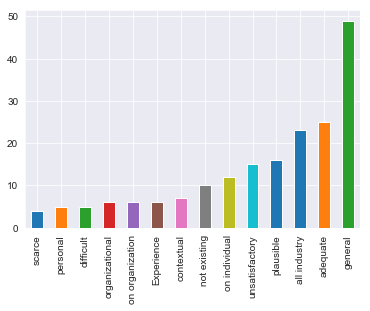

In [86]:
positive_reasons.sort_values().plot.bar()

# Reasons for Negative Ratings

In [87]:
data = dfdict['freetext-negative-final']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 23 columns):
ID                         117 non-null int64
Ifdn                       117 non-null int64
Text                       117 non-null object
not agreed                 19 non-null float64
not convinced              9 non-null float64
not needed - contextual    13 non-null float64
not needed - universal     14 non-null float64
not interesting            5 non-null float64
old fashioned              2 non-null float64
not state of the art       4 non-null float64
not solid                  1 non-null float64
weak evidence              5 non-null float64
too vague                  3 non-null float64
too specific               10 non-null float64
not efficient              5 non-null float64
not realistic              8 non-null float64
too subjective             1 non-null float64
too complicated            7 non-null float64
general objection          3 non-null float64
not RE          

### Filter invalid data

In [88]:
data = data[(data["response not valid"].isnull() & data["paper not understood"].isnull() & data["rating not negative"].isnull())]
data.head(3)

,ID,Ifdn,Text,not agreed,not convinced,not needed - contextual,not needed - universal,not interesting,old fashioned,not state of the art,...,too specific,not efficient,not realistic,too subjective,too complicated,general objection,not RE,response not valid,paper not understood,rating not negative
0,4,30,"no one cares how you developed, just that you ...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,5,35,Document driven approaches are decreasing in r...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,122,If we could see how ambiguous documentation ca...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
negative_reasons = data[data.columns[3:20]].apply(pd.DataFrame.sum,skipna=True,axis=0)
negative_reasons

not agreed                 19.0
not convinced               9.0
not needed - contextual    13.0
not needed - universal     14.0
not interesting             5.0
old fashioned               2.0
not state of the art        4.0
not solid                   1.0
weak evidence               5.0
too vague                   3.0
too specific               10.0
not efficient               5.0
not realistic               8.0
too subjective              1.0
too complicated             7.0
general objection           3.0
not RE                      3.0
dtype: float64

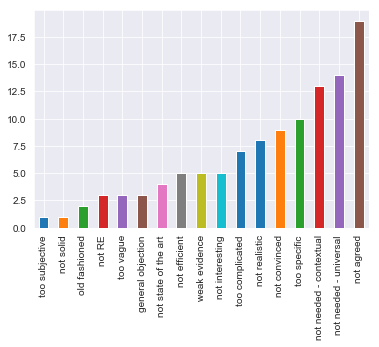

In [90]:
negative_reasons.sort_values().plot.bar()